## Introduction

To know which factor may affect the student's performance, we classify the score into couple of ranks, and figure out which feature affects the score more significant. The independent variables are follow:

1. gender : sex of students
2. race/ethnicity : ethnicity of students
3. parental level of education : parents' final education
4. lunch : having lunch before test (normal or abnormal)
5. test preparation course : complete or not complete before test

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

Let's see how many datasets in this topic.

In [2]:
os.listdir(".")

['.config', 'exam_results.csv', 'sample_data']

Only one! Take a look at the dataset.


In [3]:
filename = "exam_results.csv"
score_df = pd.read_csv(filename)
score_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# New Section

Some column names are too long, rename the column names to be simpler. 

In [4]:
score_df.rename(columns={"race/ethnicity":"ethnicity","parental level of education":"parent_education"
                    ,"math score":"math","reading score":"reading","writing score":"writing",
                    "test preparation course":"pre"},inplace=True)
score_df.head()

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Seems clearly. Check the data type.

In [5]:
score_df.dtypes

gender              object
ethnicity           object
parent_education    object
lunch               object
pre                 object
math                 int64
reading              int64
writing              int64
dtype: object

Plotting the average scores per gender. Use a Matplotlib Barplot

Plot the average scores per category of "lunch" and "pre". Use a seaborn boxplot chart.

In [6]:
score_df.groupby("gender")[list(score_df.columns[-3:])[0]].mean()

gender
female    63.633205
male      68.728216
Name: math, dtype: float64

In [7]:
score_df.groupby("gender")[list(score_df.columns[-3:])[1]].mean()

gender
female    72.608108
male      65.473029
Name: reading, dtype: float64

In [8]:
score_df.groupby("gender")[list(score_df.columns[-3:])[2]].mean()

gender
female    72.467181
male      63.311203
Name: writing, dtype: float64

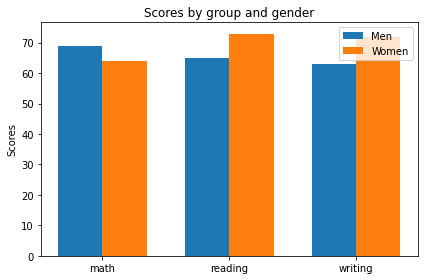

In [9]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['math', 'reading', 'writing']
men_means = [69, 65, 63]
women_means = [64, 73, 72]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



fig.tight_layout()

plt.show()

As you can see the men are better in the math catagory but worse in both reading and writing

In [10]:
score_df.groupby("lunch")['math'].mean()

lunch
free/reduced    58.921127
standard        70.034109
Name: math, dtype: float64

In [11]:
score_df.groupby("lunch")['reading'].mean()

lunch
free/reduced    64.653521
standard        71.654264
Name: reading, dtype: float64

In [12]:
score_df.groupby("lunch")['writing'].mean()

lunch
free/reduced    63.022535
standard        70.823256
Name: writing, dtype: float64

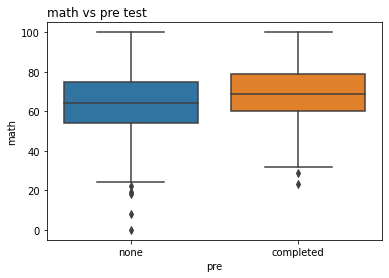

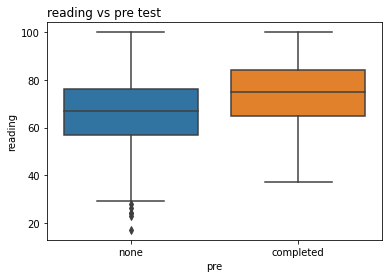

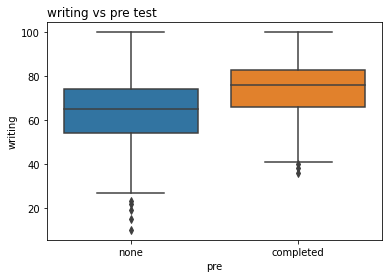

In [13]:
for item in score_df.columns[-3:]:
    sns.boxplot(x=score_df["pre"], y=score_df[item])
    plt.title(item+" vs pre test", loc="left")
    plt.show()

As you can see when people complted the pre test their scores were higher.


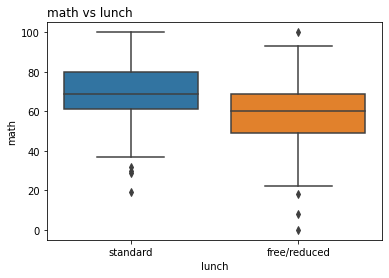

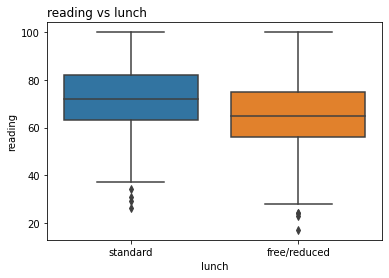

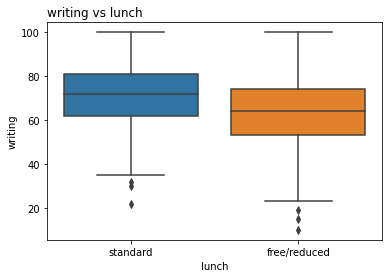

In [14]:

for item in score_df.columns[-3:]:
    sns.boxplot(x=score_df["lunch"], y=score_df[item])
    plt.title(item+" vs lunch", loc="left")
    plt.show()

As you can see people with standered lunch did better than thoes without